In [ ]:
from google.colab import files
files.upload()  # Upload kaggle.json here


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"ordustephen","key":"3b804872cd25495419d918e156a842b4"}'}

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [ ]:
!kaggle datasets download rajnathpatel/multilingual-spam-data
!unzip multilingual-spam-data.zip

Dataset URL: https://www.kaggle.com/datasets/rajnathpatel/multilingual-spam-data
License(s): GPL-2.0
  0% 0.00/958k [00:00<?, ?B/s]
100% 958k/958k [00:00<00:00, 1.19GB/s]
Archive:  multilingual-spam-data.zip
  inflating: data-en-hi-de-fr.csv    


In [ ]:
import pandas as pd

df = pd.read_csv('data-en-hi-de-fr.csv')

In [ ]:
df.head()

,labels,text,text_hi,text_de,text_fr
0,ham,"Go until jurong point, crazy.. Available only ...","Dakag बिंदु तक जाओ, पागल. केवल Bag Non महान वि...","Gehen Sie bis jurong Punkt, verrückt.. Verfügb...","Allez jusqu'à Jurong point, fou.. Disponible s..."
1,ham,Ok lar... Joking wif u oni...,ओके लामर.... if if uue पर.,Ok Lar... joking wif u oni...,J'ai fait une blague sur le wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,Fktatatat 21 मई को प्राप्त करने के लिए मुफ्त प...,Freier Eintritt in 2 a wkly comp zum Gewinn FA...,Entrée libre dans 2 a wkly comp pour gagner FA...
3,ham,U dun say so early hor... U c already then say...,Uden इतना जल्दी कहते हैं... तो पहले से ही यूसी...,U dun sagen so früh... U c schon dann sagen...,U dun dit si tôt hor... U c déjà dire alors...
4,ham,"Nah I don't think he goes to usf, he lives aro...","नहीं, मुझे नहीं लगता कि वह हमारे लिए चला जाता ...","Nein, ich glaube nicht, dass er zu unsf geht, ...","Non, je ne pense pas qu'il va à usf, il vit da..."


In [ ]:
df.columns = ['labels', 'english', 'hindi', 'german', 'french']

In [ ]:
df.columns.tolist()

['labels', 'english', 'hindi', 'german', 'french']

In [ ]:
label_map = {"ham": 0, "spam": 1}
df['labels'] = df['labels'].map(label_map)

In [ ]:
df.head()

,labels,english,hindi,german,french
0,0,"Go until jurong point, crazy.. Available only ...","Dakag बिंदु तक जाओ, पागल. केवल Bag Non महान वि...","Gehen Sie bis jurong Punkt, verrückt.. Verfügb...","Allez jusqu'à Jurong point, fou.. Disponible s..."
1,0,Ok lar... Joking wif u oni...,ओके लामर.... if if uue पर.,Ok Lar... joking wif u oni...,J'ai fait une blague sur le wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,Fktatatat 21 मई को प्राप्त करने के लिए मुफ्त प...,Freier Eintritt in 2 a wkly comp zum Gewinn FA...,Entrée libre dans 2 a wkly comp pour gagner FA...
3,0,U dun say so early hor... U c already then say...,Uden इतना जल्दी कहते हैं... तो पहले से ही यूसी...,U dun sagen so früh... U c schon dann sagen...,U dun dit si tôt hor... U c déjà dire alors...
4,0,"Nah I don't think he goes to usf, he lives aro...","नहीं, मुझे नहीं लगता कि वह हमारे लिए चला जाता ...","Nein, ich glaube nicht, dass er zu unsf geht, ...","Non, je ne pense pas qu'il va à usf, il vit da..."


In [ ]:
df_train = pd.concat([
    pd.DataFrame({'text': df['english'], 'label': df['labels'], 'lang': 'en'}),
    pd.DataFrame({'text': df['hindi'],   'label': df['labels'], 'lang': 'hi'})
], ignore_index=True)


In [ ]:
df_train.head()

,text,label,lang
0,"Go until jurong point, crazy.. Available only ...",0,en
1,Ok lar... Joking wif u oni...,0,en
2,Free entry in 2 a wkly comp to win FA Cup fina...,1,en
3,U dun say so early hor... U c already then say...,0,en
4,"Nah I don't think he goes to usf, he lives aro...",0,en


In [ ]:
df_test = pd.DataFrame({'text': df['german'], 'label': df['labels'], 'lang': 'de'})

In [ ]:
from transformers import AutoTokenizer

In [ ]:
model_name = "xlm-roberta-base"
tokenizer = AutoTokenizer.from_pretrained(model_name)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/615 [00:00<?, ?B/s]

sentencepiece.bpe.model:   0%|          | 0.00/5.07M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/9.10M [00:00<?, ?B/s]

In [ ]:
# Tokenization function
def tokenize_texts(texts):
    return tokenizer(
        texts,
        truncation=True,
        padding=True,
        max_length=128,
        return_tensors="pt"
    )

In [ ]:
# Apply to training and test text
train_encodings = tokenize_texts(df_train["text"].tolist())
test_encodings = tokenize_texts(df_test["text"].tolist())

In [ ]:
import torch

class SpamDataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels, texts=None):
        self.encodings = encodings
        self.labels = labels
        self.texts = texts

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx])
        if self.texts is not None:
            item['text'] = self.texts[idx]
        return item

In [ ]:
train_dataset = SpamDataset(train_encodings, df_train["label"].tolist(), df_train["text"].tolist())
test_dataset = SpamDataset(test_encodings, df_test["label"].tolist(), df_test["text"].tolist())

In [ ]:
train_dataset.encodings

{'input_ids': tensor([[    0,  2016, 24189,  ...,     1,     1,     1],
        [    0,  9972,     6,  ...,     1,     1,     1],
        [    0,  5153, 42805,  ...,     1,     1,     1],
        ...,
        [    0,  2073, 12262,  ...,     1,     1,     1],
        [    0, 95883,  7494,  ...,     1,     1,     1],
        [    0, 55624, 14789,  ...,     1,     1,     1]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0]])}

In [ ]:
from transformers import TrainingArguments, Trainer

training_args = TrainingArguments(
    output_dir="./results",
    eval_strategy="no",                # Skip eval during training
    save_strategy="no",                      # Avoid saving checkpoints
    learning_rate=3e-5,                      # Slightly higher learning rate
    per_device_train_batch_size=32,         # Larger batch (if memory allows)
    num_train_epochs=3,                     # Fewer epochs
    weight_decay=0.01,
    logging_steps=50,                       # More frequent logs
    logging_dir="./logs",
    report_to="none",                       # Disable wandb if unnecessary
    disable_tqdm=False,                     # Keep progress bar
    save_total_limit=1                      # Just in case saving is triggered
)


In [ ]:
import numpy as np
from sklearn.metrics import accuracy_score, f1_score

def compute_metrics(eval_pred):
    logits, labels = eval_pred
    preds = np.argmax(logits, axis=1)
    return {
        "accuracy": accuracy_score(labels, preds),
        "f1": f1_score(labels, preds, average="weighted"),
    }

In [ ]:
from transformers import AutoModelForSequenceClassification

model = AutoModelForSequenceClassification.from_pretrained("xlm-roberta-base", num_labels=2)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
    compute_metrics=compute_metrics,
    tokenizer=tokenizer,
)

model.safetensors:   0%|          | 0.00/1.12G [00:00<?, ?B/s]

Some weights of XLMRobertaForSequenceClassification were not initialized from the model checkpoint at xlm-roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/tmp/ipython-input-2988237844.py:5: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


In [ ]:

trainer.train()

/tmp/ipython-input-1375192033.py:13: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
/usr/local/lib/python3.11/dist-packages/torch/nn/modules/module.py:1750: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `XLMRobertaSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


Step,Training Loss
50,0.255600
100,0.157000
150,0.117500
200,0.147900
250,0.116700
300,0.086900
350,0.090600
400,0.052300
450,0.051100
500,0.068100


TrainOutput(global_step=1047, training_loss=0.07108170955433886, metrics={'train_runtime': 735.8712, 'train_samples_per_second': 45.432, 'train_steps_per_second': 1.423, 'total_flos': 2199082200698880.0, 'train_loss': 0.07108170955433886, 'epoch': 3.0})

In [ ]:
# Predict on German test set
test_preds = trainer.predict(test_dataset)

# Extract predictions
logits = test_preds.predictions
preds = logits.argmax(axis=-1)
labels = test_preds.label_ids


/tmp/ipython-input-1375192033.py:13: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Print classification report
print(classification_report(labels, preds, target_names=["ham", "spam"]))

# Confusion matrix
cm = confusion_matrix(labels, preds)

# Plot it
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["ham", "spam"], yticklabels=["ham", "spam"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - German (Zero-shot)")
plt.show()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

log_history = trainer.state.log_history
df_logs = pd.DataFrame(log_history)

# Filter for loss values
loss_df = df_logs[df_logs['loss'].notna()]

plt.plot(loss_df['step'], loss_df['loss'], label='Training Loss')
if 'eval_loss' in df_logs.columns:
    eval_df = df_logs[df_logs['eval_loss'].notna()]
    plt.plot(eval_df['step'], eval_df['eval_loss'], label='Validation Loss')
plt.xlabel("Steps")
plt.ylabel("Loss")
plt.title("Training vs Validation Loss")
plt.legend()
plt.grid()
plt.show()

In [ ]:
labels

In [ ]:
# Sample misclassified German examples
misclassified = [i for i in range(len(preds)) if preds[i] != labels[i]]

for i in misclassified[:5]:  # Show first 5 mistakes
    print(f"Text: {test_dataset[i]['text']}")
    print(f"True Label: {labels[i]}, Predicted: {preds[i]}")
    print("-" * 50)

/tmp/ipython-input-1375192033.py:13: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
/usr/local/lib/python3.11/dist-packages/torch/nn/modules/module.py:1750: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `XLMRobertaSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)
/tmp/ipython-input-1375192033.py:13: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}


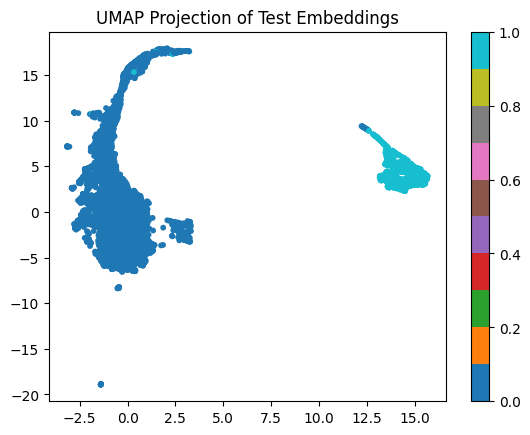

In [ ]:
from sklearn.manifold import TSNE
from umap import UMAP
from sklearn.preprocessing import LabelEncoder

# Get last hidden layer representations
from torch.utils.data import DataLoader

def get_embeddings(model, dataset):
    dataloader = DataLoader(dataset, batch_size=32)
    model.eval()
    embeddings = []
    with torch.no_grad():
        for batch in dataloader:
            inputs = {k: v.to(model.device) for k, v in batch.items() if k != 'labels' and k != 'text'}
            outputs = model(**inputs, output_hidden_states=True)
            cls_embeddings = outputs.hidden_states[-1][:, 0].cpu().numpy()  # CLS token
            embeddings.extend(cls_embeddings)
    return embeddings

# Extract and reduce
embeddings = get_embeddings(model, test_dataset)
umap_2d = UMAP(n_components=2).fit_transform(embeddings)

# Plot
import matplotlib.pyplot as plt
labels = [d['labels'].item() for d in test_dataset] # Changed 'label' to 'labels' and added .item()
plt.scatter(umap_2d[:, 0], umap_2d[:, 1], c=labels, cmap='tab10', s=10)
plt.title("UMAP Projection of Test Embeddings")
plt.colorbar()
plt.show()

In [ ]:
def predict_spam(text, model, tokenizer):
    inputs = tokenizer(text, return_tensors="pt", truncation=True, padding=True, max_length=128)
    # Move inputs to the same device as the model
    device = model.device
    inputs = {k: v.to(device) for k, v in inputs.items()}
    model.eval()
    with torch.no_grad():
        outputs = model(**inputs)
    logits = outputs.logits
    prediction = torch.argmax(logits, dim=-1).item()
    return "spam" if prediction == 1 else "ham"


In [ ]:
# German (Spam)
german_spam = "Jetzt anmelden und ein brandneues iPhone gewinnen!"
print(f"German spam: '{german_spam}' -> Prediction: {predict_spam(german_spam, model, tokenizer)}")

# German (Ham)
german_ham = "Könntest du mir bitte die Unterlagen bis morgen schicken?"
print(f"German ham: '{german_ham}' -> Prediction: {predict_spam(german_ham, model, tokenizer)}")

# English (Spam)
english_spam = "Get rich quick! Work from home and earn $5000 weekly!"
print(f"English spam: '{english_spam}' -> Prediction: {predict_spam(english_spam, model, tokenizer)}")

# English (Ham)
english_ham = "Let's meet tomorrow to finalize the project plan."
print(f"English ham: '{english_ham}' -> Prediction: {predict_spam(english_ham, model, tokenizer)}")

# French (Spam)
french_spam = "Vous avez été sélectionné pour un voyage gratuit à Paris!"
print(f"French spam: '{french_spam}' -> Prediction: {predict_spam(french_spam, model, tokenizer)}")

# French (Ham)
french_ham = "Je suis en réunion maintenant, je t'appelle plus tard."
print(f"French ham: '{french_ham}' -> Prediction: {predict_spam(french_ham, model, tokenizer)}")

# Arabic (Spam)
arabic_spam = "ربحت جائزة مالية ضخمة! اتصل الآن لاستلامها."
print(f"Arabic spam: '{arabic_spam}' -> Prediction: {predict_spam(arabic_spam, model, tokenizer)}")

# Arabic (Ham)
arabic_ham = "سأصل إلى المكتب الساعة العاشرة صباحًا."
print(f"Arabic ham: '{arabic_ham}' -> Prediction: {predict_spam(arabic_ham, model, tokenizer)}")


German spam: 'Jetzt anmelden und ein brandneues iPhone gewinnen!' -> Prediction: spam
German ham: 'Könntest du mir bitte die Unterlagen bis morgen schicken?' -> Prediction: ham
English spam: 'Get rich quick! Work from home and earn $5000 weekly!' -> Prediction: spam
English ham: 'Let's meet tomorrow to finalize the project plan.' -> Prediction: ham
French spam: 'Vous avez été sélectionné pour un voyage gratuit à Paris!' -> Prediction: spam
French ham: 'Je suis en réunion maintenant, je t'appelle plus tard.' -> Prediction: ham
Arabic spam: 'ربحت جائزة مالية ضخمة! اتصل الآن لاستلامها.' -> Prediction: spam
Arabic ham: 'سأصل إلى المكتب الساعة العاشرة صباحًا.' -> Prediction: ham


/usr/local/lib/python3.11/dist-packages/torch/nn/modules/module.py:1750: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `XLMRobertaSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


In [ ]:
trainer.save_model("./local_model")
tokenizer.save_pretrained("./local_model")

('./local_model/tokenizer_config.json',
 './local_model/special_tokens_map.json',
 './local_model/sentencepiece.bpe.model',
 './local_model/added_tokens.json',
 './local_model/tokenizer.json')

In [ ]:
import shutil
import os

# Directory where the model and tokenizer were saved
model_dir = "./local_model"
zip_filename = "spam_model.zip"

# Create a zip archive
shutil.make_archive(zip_filename.replace(".zip", ""), 'zip', model_dir)

print(f"Model saved as {zip_filename}")

Model saved as spam_model.zip


In [ ]:
from google.colab import files
files.download("spam_model.zip")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>